# Real-world Data Wrangling

In [1]:
!python -m pip install kaggle==1.6.12

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.12-py3-none-any.whl size=102984 sha256=801345b98654145f8dd5d3bb0f78d2861e24efd9222ef3c3ba75171650f8333b
  Stored in directory: c:\users\ganaj\appdata\local\pip\cache\wheels\2a\00\63\fa8dbcfb1458e6a65ac7a28d456deb9e0e033245b67f952681
Successfully built kaggle


In [2]:
!pip install --target=/workspace ucimlrepo

  Using cached pandas-2.2.2-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.1.1-cp312-cp312-win_amd64.whl.metadata (59 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl.metadata (1.8 kB)
Using cached pandas-2.2.2-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached numpy-2.1.1-cp312-cp312-win_amd64.whl (12.6 MB)
Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)


## 1. Gather data

### **1.1.** Problem Statement

I want to look at two datasets, one that provides a view of poverty in American cities and another that provides data on the health of the citizens in these cities. While the datasets provide information from across the nation, I want to examine cities within the state of California and see if there is a correlation between poverty and the prevalence of binge drinking and smoking within these cities. 

### **1.2.** Gather at least two datasets using two different data gathering methods

In [369]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

#### **Dataset 1**

Type: CSV File

Method: The data was gathered using the "Downloading files" method from https://data.bayareametro.gov/dataset/Vital-Signs-Poverty-by-city-2022-/qgxa-b4zm/about_data. I chose this method as the website provides a quick and simple way to download the file. Along with that, the file itself is relatively small, with only around 1,600 data samples.

Dataset variables:

*   Variable 1 City: refers to the city
*   Variable 2 Pov200: refers to the poverty population of the city

In [370]:
#FILL IN 1st data gathering and loading method
# Load the local CSV file
pov_data = pd.read_csv('PovertyByCity.csv')
pov_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1616 entries, 0 to 1615
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       1616 non-null   object 
 1   County     1616 non-null   object 
 2   Year       1616 non-null   int64  
 3   PovPop     1612 non-null   float64
 4   Pov100     1612 non-null   float64
 5   Pov200     1612 non-null   float64
 6   PovPCT200  1612 non-null   float64
 7   PovPCT100  1612 non-null   float64
 8   Source     1612 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 113.8+ KB


#### Dataset 2

Type: CSV File

Method: The data was gathered using the "API" method from https://data.cdc.gov/500-Cities-Places/500-Cities-Census-Tract-level-Data-GIS-Friendly-Fo/k86t-wghb/about_data. I chose this method as the website was not as user friendly as the first one had been, but it did provide a simplistic link to use the API method. Additionally, the file is much larger than the first, with over 27,200 data samples, meaning it would consume more space if I used the same method as the first.

Dataset variables:

*   Variable 1 population2010: refers to the city's overall population
*   Variable 2 binge_crudeprev: refers to the model-based estimate for crude prevalence of binge drinking among adults

In [371]:
#FILL IN 2nd data gathering and loading method
# Define the API endpoint and parameters
url = 'https://data.cdc.gov/resource/k86t-wghb.json'
limit = 50000  # Set the limit for the number of records to fetch
offset = 0
all_data = []

# Fetch data from the API in batches
while True:
    response = requests.get(url, params={'$limit': limit, '$offset': offset})
    data = response.json()
    if not data:
        break
    all_data.extend(data)
    offset += limit

# Convert the fetched data into a DataFrame
bin_data = pd.DataFrame(all_data)
bin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27210 entries, 0 to 27209
Data columns (total 63 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   stateabbr               27210 non-null  object
 1   placename               27210 non-null  object
 2   placefips               27210 non-null  object
 3   tractfips               27210 non-null  object
 4   place_tractid           27210 non-null  object
 5   population2010          27210 non-null  object
 6   access2_crudeprev       27209 non-null  object
 7   access2_crude95ci       27209 non-null  object
 8   arthritis_crudeprev     27210 non-null  object
 9   arthritis_crude95ci     27210 non-null  object
 10  binge_crudeprev         27210 non-null  object
 11  binge_crude95ci         27210 non-null  object
 12  bphigh_crudeprev        27210 non-null  object
 13  bphigh_crude95ci        27210 non-null  object
 14  bpmed_crudeprev         27210 non-null  object
 15  bp

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

### Quality Issue 1:

In [373]:
#FILL IN - Inspecting the dataframe visually
# Identify non-numeric columns
non_numeric_columns = bin_data.select_dtypes(include=['object']).columns

# Display sample data from non-numeric columns to inspect data
print("\nSample data from non-numeric columns:")
print(bin_data[non_numeric_columns].head())

# Check specific columns that should be numeric
print("\nInspecting specific columns for non-numeric values:")
for column in ['population2010', 'binge_crudeprev', 'csmoking_crudeprev']:
    print(f"\nUnique values in column '{column}':")
    print(bin_data[column].unique())


Sample data from non-numeric columns:
  stateabbr   placename placefips    tractfips        place_tractid  \
0        AL  Birmingham   0107000  01073000100  0107000-01073000100   
1        AL  Birmingham   0107000  01073000300  0107000-01073000300   
2        AL  Birmingham   0107000  01073000400  0107000-01073000400   
3        AL  Birmingham   0107000  01073000500  0107000-01073000500   
4        AL  Birmingham   0107000  01073000700  0107000-01073000700   

  population2010 access2_crudeprev access2_crude95ci arthritis_crudeprev  \
0           3042              24.4      (21.2, 27.8)                31.2   
1           2735              30.4      (27.1, 33.7)                30.5   
2           3338              24.7      (21.1, 28.5)                31.5   
3           2864              25.2      (21.6, 29.0)                35.0   
4           2577              29.0      (24.5, 33.8)                36.3   

  arthritis_crude95ci  ... paptest_crude95ci phlth_crudeprev phlth_crude95ci 

In [374]:
#FILL IN - Inspecting the dataframe programmatically
# Check data types of all columns
print("Data Types of Each Column:")
print(bin_data.dtypes)

# Identify columns that should be numeric but are not
non_numeric_columns = bin_data.select_dtypes(include=['object']).columns
print("Columns with object data types (potentially incorrect):")
print(non_numeric_columns)

Data Types of Each Column:
stateabbr              object
placename              object
placefips              object
tractfips              object
place_tractid          object
                        ...  
stroke_crudeprev       object
stroke_crude95ci       object
teethlost_crudeprev    object
teethlost_crude95ci    object
geolocation            object
Length: 63, dtype: object
Columns with object data types (potentially incorrect):
Index(['stateabbr', 'placename', 'placefips', 'tractfips', 'place_tractid',
       'population2010', 'access2_crudeprev', 'access2_crude95ci',
       'arthritis_crudeprev', 'arthritis_crude95ci', 'binge_crudeprev',
       'binge_crude95ci', 'bphigh_crudeprev', 'bphigh_crude95ci',
       'bpmed_crudeprev', 'bpmed_crude95ci', 'cancer_crudeprev',
       'cancer_crude95ci', 'casthma_crudeprev', 'casthma_crude95ci',
       'chd_crudeprev', 'chd_crude95ci', 'checkup_crudeprev',
       'checkup_crude95ci', 'cholscreen_crudeprev', 'cholscreen_crude95ci',
       '

Issue and justification: Having variables in the wrong type is a quality issue because it leads to inaccurate values. It can lead to incorrect analyses and results. For instance, if numerical data is stored as text, mathematical operations and aggregations will fail or yield erroneous outputs, which impacts the accuracy of the correlation analysis between smoking, binge drinking, and poverty rates. Programmatic inspection with bin_data.dtypes identifies columns with incorrect types, while visual checks with bin_data[non_numeric_columns].head() confirm specific data issues. This approach ensures accurate data types, which is crucial for reliable analysis of smoking, binge drinking, and poverty rates.

### Quality Issue 2:

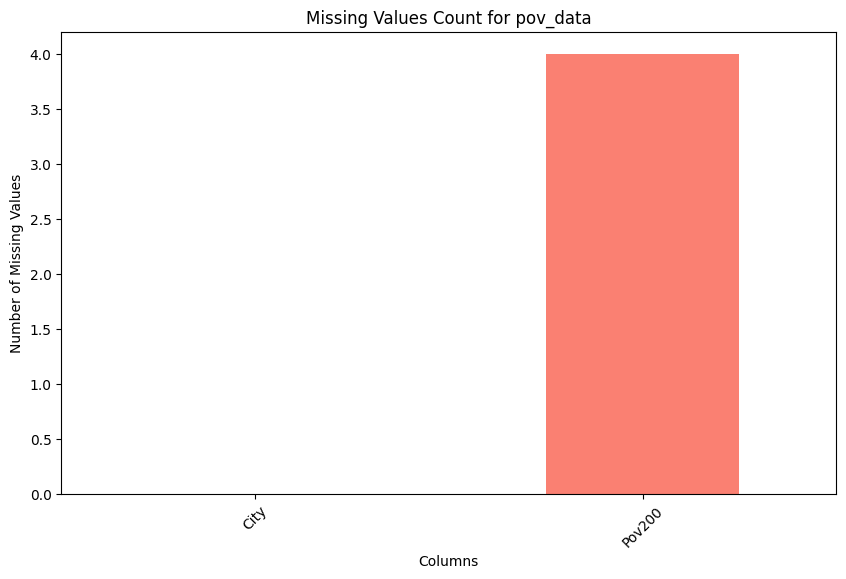

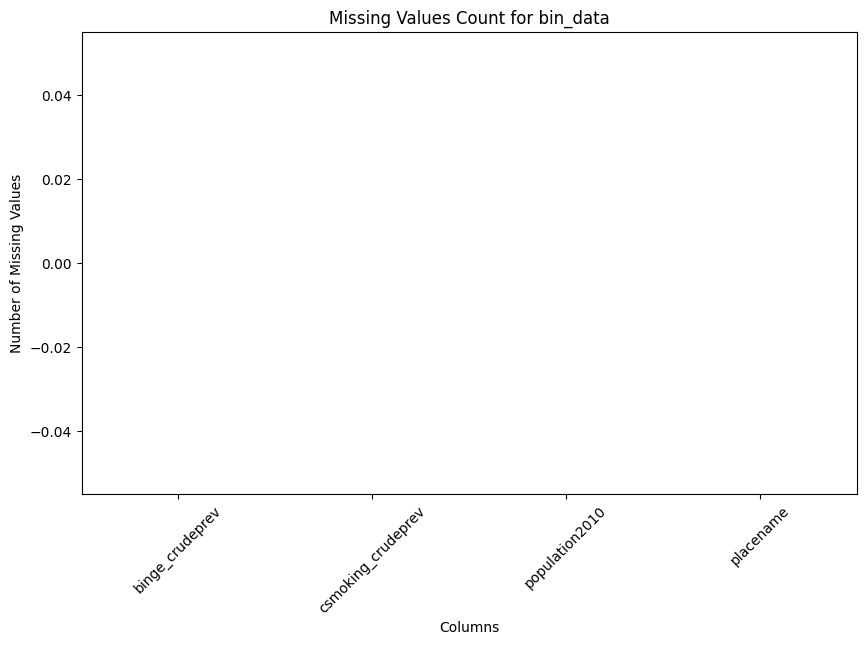

In [375]:
#FILL IN - Inspecting the dataframe visually
# Count missing values in pov_data
missing_counts_pov = pov_data[['City', 'Pov200']].isnull().sum()

# Bar plot for missing values in pov_data
plt.figure(figsize=(10, 6))
missing_counts_pov.plot(kind='bar', color='salmon')
plt.title('Missing Values Count for pov_data')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()

# Count missing values in bin_data
missing_counts_bin = bin_data[['binge_crudeprev', 'csmoking_crudeprev', 'population2010', 'placename']].isnull().sum()

# Bar plot for missing values in bin_data
plt.figure(figsize=(10, 6))
missing_counts_bin.plot(kind='bar', color='skyblue')
plt.title('Missing Values Count for bin_data')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()

In [376]:
#FILL IN - Inspecting the dataframe programmatically
# Check for missing values in specific columns
missing_values_bin = bin_data[['binge_crudeprev', 'csmoking_crudeprev', 'population2010', 'placename']].isnull().sum()
missing_values_pov = pov_data[['City', 'Pov200']].isnull().sum()

print("\nMissing values in bin_data:")
print(missing_values_bin)
print("\nMissing values in pov_data:")
print(missing_values_pov)



Missing values in bin_data:
binge_crudeprev       0
csmoking_crudeprev    0
population2010        0
placename             0
dtype: int64

Missing values in pov_data:
City      0
Pov200    4
dtype: int64


Issue and justification: Missing values in a dataset represent a significant quality issue because they can lead to incomplete or biased analysis, affecting the reliability of insights and decisions derived from the data. In particular, missing values can distort statistical analyses and model predictions if not properly accounted for. To inspect this issue, I used code that checks for missing values programmatically and visualizes them through bar plots. This approach allowed me to quantitatively and visually identify the extent of missing data, making it easier to assess which columns and datasets require further attention or cleaning.

### Tidiness Issue 1:

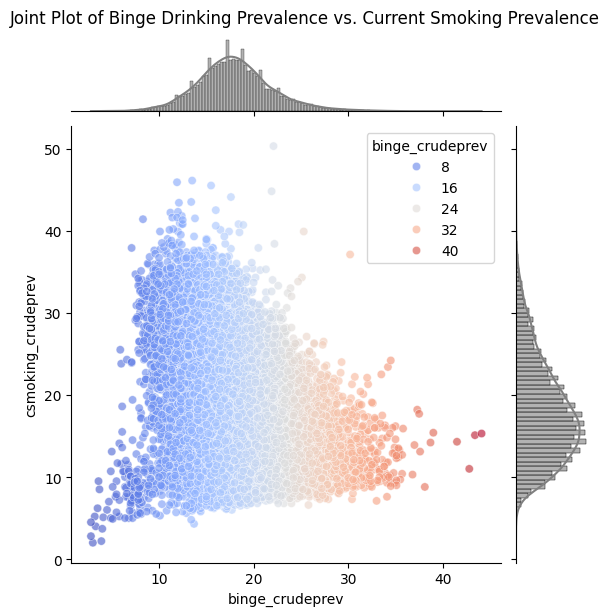

In [377]:
#FILL IN - Inspecting the dataframe visually
# Ensure data is numeric and cleaned
filtered_data = bin_data.dropna(subset=['binge_crudeprev', 'csmoking_crudeprev'])

# Convert columns to numeric
filtered_data['binge_crudeprev'] = pd.to_numeric(filtered_data['binge_crudeprev'], errors='coerce')
filtered_data['csmoking_crudeprev'] = pd.to_numeric(filtered_data['csmoking_crudeprev'], errors='coerce')

# Create a JointGrid object
g = sns.JointGrid(data=filtered_data, x='binge_crudeprev', y='csmoking_crudeprev')

# Use scatterplot to add scatter points with a color mapping
sns.scatterplot(x='binge_crudeprev', y='csmoking_crudeprev', data=filtered_data, hue='binge_crudeprev', palette='coolwarm', alpha=0.6, ax=g.ax_joint)

# Add histograms for marginal distributions
g.plot_marginals(sns.histplot, kde=True, color='gray', alpha=0.6)

# Add title
plt.suptitle('Joint Plot of Binge Drinking Prevalence vs. Current Smoking Prevalence', y=1.02)

# Show the plot
plt.show()

In [378]:
#FILL IN - Inspecting the dataframe programmatically
unique_binge = bin_data['binge_crudeprev'].unique()
unique_csmoking = bin_data['csmoking_crudeprev'].unique()
print("Unique binge drinking values in 'bin_data':")
print(unique_binge)
print("Unique smoking values in 'bin_data':")
print(unique_csmoking)

Unique binge drinking values in 'bin_data':
['10.3' '10.5' '10.4' '9.1' '7.6' '8.6' '9.9' '10.2' '9.6' '9.8' '9.0'
 '9.7' '9.2' '10.6' '9.3' '16.5' '15.8' '11.6' '13.3' '8.7' '13.9' '7.8'
 '8.0' '11.4' '10.0' '14.0' '17.3' '14.8' '17.1' '16.8' '8.2' '8.1' '8.8'
 '12.3' '13.4' '15.1' '11.1' '11.9' '11.7' '12.1' '7.9' '16.1' '18.4'
 '14.7' '11.3' '12.2' '12.6' '10.9' '12.0' '20.8' '17.7' '21.9' '8.4'
 '10.8' '16.0' '20.4' '15.9' '15.2' '16.7' '14.4' '17.0' '17.5' '16.3'
 '12.8' '15.5' '19.6' '13.8' '13.7' '14.5' '10.7' '18.3' '9.5' '10.1'
 '8.9' '12.7' '15.7' '15.0' '14.6' '12.9' '13.1' '15.6' '11.8' '13.5'
 '12.4' '17.4' '14.9' '16.4' '13.6' '16.2' '19.7' '17.6' '5.9' '8.5'
 '11.0' '19.0' '12.5' '15.4' '18.1' '14.3' '13.0' '22.1' '17.2' '7.5'
 '24.1' '17.8' '14.2' '22.4' '19.1' '16.6' '13.2' '18.9' '22.8' '11.2'
 '14.1' '21.3' '20.3' '23.5' '21.7' '20.5' '29.9' '28.6' '19.2' '16.9'
 '18.5' '21.4' '17.9' '20.0' '19.9' '21.1' '19.8' '18.7' '20.1' '21.8'
 '19.4' '18.0' '21.0' '20.6' '19.5'

Issue and justification: Having multiple observational units (data on binge drinking and smoking) within a single dataset can be considered a tidiness issue because it violates the principle of having one variable per column and one observation per row. This can make data manipulation and analysis more challenging, as the dataset lacks clear separation between distinct types of information. Using a joint plot helps to visually inspect how the dataset is structured and identify if the observations are appropriately aligned or if the dataset is cluttered with overlapping data. Similarly, inspecting unique values programmatically helps to reveal any inconsistencies or unexpected variations in the data, highlighting potential issues with how the information is organized. This dataset should be split into two distinct datasets.

### Tidiness Issue 2: 

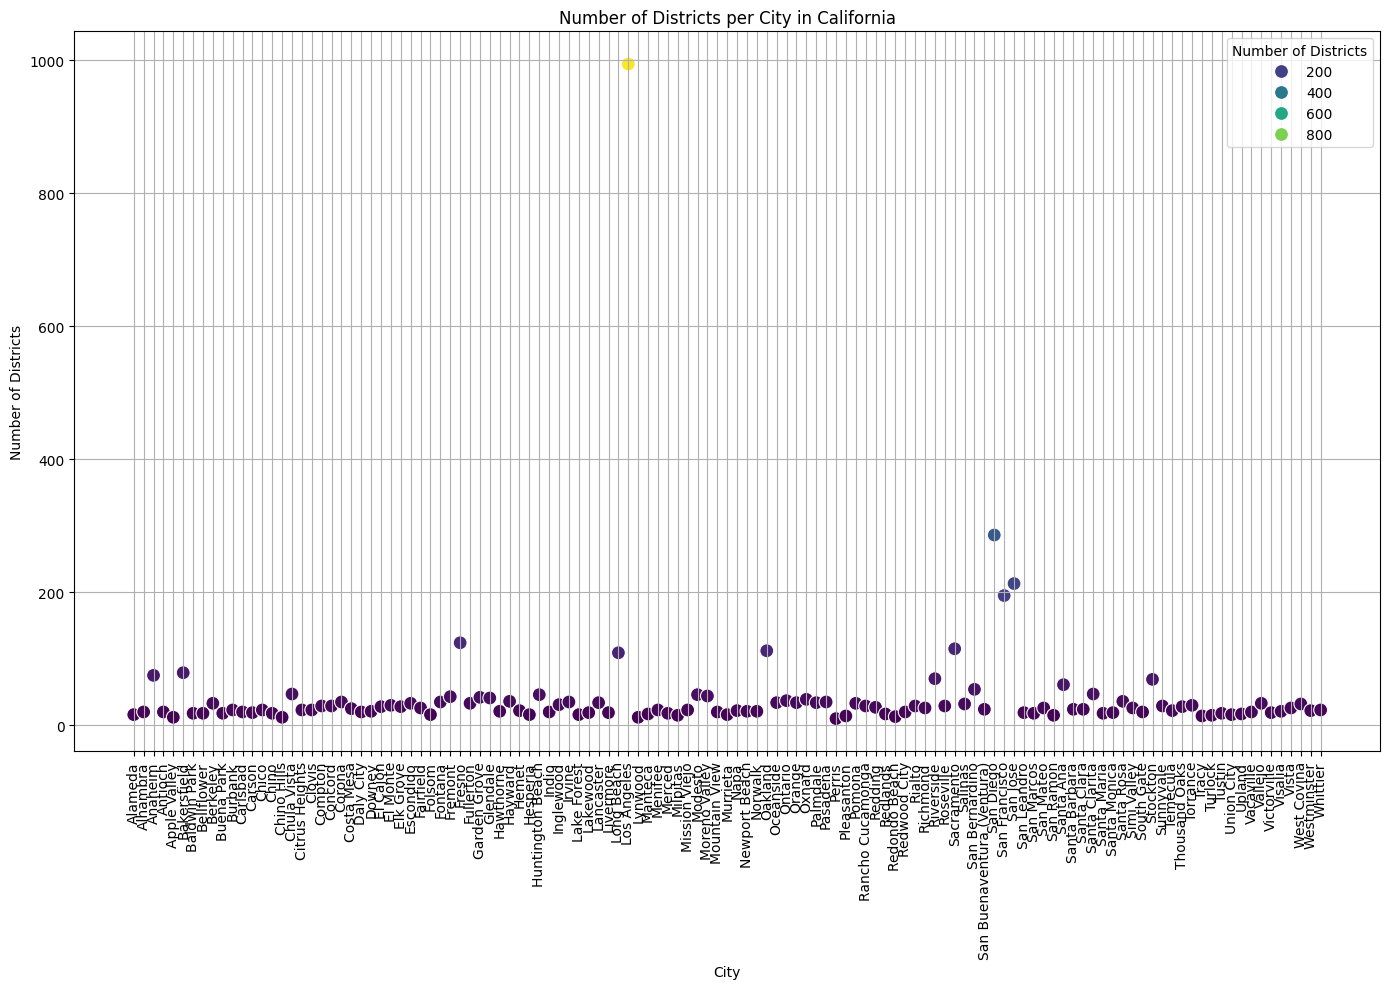

In [379]:
#FILL IN - Inspecting the dataframe visually
# Filter the dataset for cities in California (StateAbbr == 'CA')
ca_data = bin_data[bin_data['stateabbr'] == 'CA']

# Calculate the number of unique population groups per city in California
city_district_counts = ca_data.groupby('placename')['population2010'].count().reset_index()

# Rename columns for clarity
city_district_counts.columns = ['City', 'Number of Districts']

# Plot
plt.figure(figsize=(14, 10))
sns.scatterplot(data=city_district_counts, x='City', y='Number of Districts', hue='Number of Districts', palette='viridis', s=100)
plt.title('Number of Districts per City in California')
plt.xlabel('City')
plt.ylabel('Number of Districts')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

In [380]:
#FILL IN - Inspecting the dataframe programmatically
# Filter the dataset for cities in California (StateAbbr == 'CA')
ca_data = bin_data[bin_data['stateabbr'] == 'CA']

# Count the number of districts (population2010) for each city in California
city_district_counts = ca_data.groupby('placename')['population2010'].count()

# Display the counts
print("Number of districts per city in California:")
print(city_district_counts)

# Summary statistics for the number of districts per city in California
summary_statistics = city_district_counts.describe()

print("Summary statistics for district counts per city in California:")
print(summary_statistics)

Number of districts per city in California:
placename
Alameda         16
Alhambra        20
Anaheim         75
Antioch         20
Apple Valley    12
                ..
Visalia         21
Vista           26
West Covina     32
Westminster     22
Whittier        23
Name: population2010, Length: 121, dtype: int64
Summary statistics for district counts per city in California:
count    121.000000
mean      43.297521
std       94.997951
min       10.000000
25%       19.000000
50%       24.000000
75%       34.000000
max      994.000000
Name: population2010, dtype: float64


Issue and justification: Another tidiness issue is that the first dataset and the second dataset differ in how cities are represented. The first dataset has data that has multiple rows for a single city being split by years, but the second dataset has multiple rows for a single city being split by the district's population within the city. This is a major tidiness issue to the conclusion's validity because if these districts are not grouped together to accurately reflect a single city, a single district could be misinterpreted as a whole city on its own. When values that logically belong together are split across multiple rows, it can complicate analysis and lead to incorrect conclusions. This issue can be seen in the scatterplot where most cities can be shown hovering within the 0-200 cell and with a handful even passing the 200 mark, showing the overall number of districts, or rows, connected to a single city. This discrepancy is significant because my research question aims to explore the relationship between the prevalence of smoking and binge drinking and the overall poverty rate within a single city; using data that is divided by districts could affect the validity of my conclusions. By programmatically inspecting the data frame by using the describe function after grouping the data samples by city, I am able to get a more accurate number of districts per city, which I would not have been able to do with the visual inspection.

## 3. Clean data
Clean the data to solve the issues corresponding to data quality and tidiness found in the assessing step.

In [381]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes 
# are not impacted
# Create copies of the datasets
pov_data_clean = pov_data.copy()
bin_data_clean = bin_data.copy()

In [382]:
# Remove unnecessary variables from the first dataset
# Select only the required columns
pov_data_clean = pov_data_clean[['City', 'Year', 'Pov200']]

# Verify the columns
print("Columns after cleaning pov_data_clean:")
print(pov_data_clean.columns)

# Save the cleaned dataset
pov_data_clean.to_csv('poverty_data_2024_9_5_cleaned.csv', index=False)

Columns after cleaning pov_data_clean:
Index(['City', 'Year', 'Pov200'], dtype='object')


In [383]:
# Remove unnecessary variables from the second dataset
# Filter out rows where 'stateabbr' is not 'CA'
bin_data_clean = bin_data_clean[bin_data_clean['stateabbr'] == 'CA']

# Select only the required columns
bin_data_clean = bin_data_clean[['placename', 'population2010', 'binge_crudeprev', 'csmoking_crudeprev']]

# Verify the columns
print("Columns after cleaning bin_data_clean:")
print(bin_data_clean.columns)

# Save the cleaned dataset
bin_data_clean.to_csv('binge_data_2024_9_5_cleaned.csv', index=False)

Columns after cleaning bin_data_clean:
Index(['placename', 'population2010', 'binge_crudeprev', 'csmoking_crudeprev'], dtype='object')


In [384]:
# Feature Engineering: Keep only the year 2017

# Remove all rows that are not from the year 2017
pov_data_clean = pov_data_clean[pov_data_clean['Year'] == 2017]

# Verify that the DataFrame now only contains rows for the year 2017
print("Poverty Data for 2017:")
print(pov_data_clean.head())  # Display the first few rows to inspect
print(f"Total rows for the year 2017 in poverty data: {pov_data_clean.shape[0]}")

# Save the updated dataset back to the file
pov_data_clean.to_csv('poverty_data_2024_9_5_cleaned.csv', index=False)

Poverty Data for 2017:
               City  Year   Pov200
11          Alameda  2017  14559.0
27           Albany  2017   3919.0
43  American Canyon  2017   4365.0
59          Antioch  2017  33124.0
75         Atherton  2017    324.0
Total rows for the year 2017 in poverty data: 101


In [385]:
# Dataset Alignment: Removing cities that are unique to one dataset

# Get unique cities from each dataset
cities_pov_data = set(pov_data_clean['City'].unique())
cities_bin_data = set(bin_data_clean['placename'].unique())

# Find cities that are in both datasets
common_cities = cities_pov_data.intersection(cities_bin_data)

# Filter the datasets to keep only the common cities
pov_data_clean = pov_data_clean[pov_data_clean['City'].isin(common_cities)]
bin_data_clean = bin_data_clean[bin_data_clean['placename'].isin(common_cities)]

# Save the cleaned datasets
pov_data_clean.to_csv('poverty_data_2024_9_5_cleaned.csv', index=False)
bin_data_clean.to_csv('binge_data_2024_9_5_cleaned.csv', index=False)

### **Quality Issue 1: FILL IN**

In [386]:
# FILL IN - Apply the cleaning strategy
# Convert the relevant columns to numeric types
bin_data_clean['population2010'] = pd.to_numeric(bin_data_clean['population2010'], errors='coerce')
bin_data_clean['binge_crudeprev'] = pd.to_numeric(bin_data_clean['binge_crudeprev'], errors='coerce')
bin_data_clean['csmoking_crudeprev'] = pd.to_numeric(bin_data_clean['csmoking_crudeprev'], errors='coerce')

# Save the updated dataset back to the file
bin_data_clean.to_csv('binge_data_2024_9_5_cleaned.csv', index=False)

In [387]:
# FILL IN - Validate the cleaning was successful
# Check data types of all columns
print("Data Types of Each Column:")
print(bin_data_clean.dtypes)

# Identify columns that should be numeric but are not
non_numeric_columns = bin_data_clean.select_dtypes(include=['object']).columns
print("Columns with object data types:")
print(non_numeric_columns)

Data Types of Each Column:
placename              object
population2010          int64
binge_crudeprev       float64
csmoking_crudeprev    float64
dtype: object
Columns with object data types:
Index(['placename'], dtype='object')


Justification: In this cleaning process, I converted the columns population2010, binge_crudeprev, and csmoking_crudeprev values to numeric types using pd.to_numeric with the errors='coerce' parameter to handle any non-numeric entries gracefully. This approach ensures that any invalid or missing values are converted to NaN, preventing errors during data analysis and maintaining data integrity. Finally, saving the cleaned dataset to a CSV file allows for easy sharing and reproducibility of the cleaned data, ensuring it is ready for subsequent analysis steps.

### **Quality Issue 2: FILL IN**

In [388]:
#FILL IN - Apply the cleaning strategy
# Drop rows with missing values in specific columns for bin_data
bin_data_clean = bin_data.dropna(subset=['binge_crudeprev', 'csmoking_crudeprev', 'population2010', 'placename'])

# Drop rows with missing values in specific columns for pov_data
pov_data_clean = pov_data.dropna(subset=['City', 'Pov200'])

In [389]:
#FILL IN - Validate the cleaning was successful
# Check for missing values in specific columns
missing_values_bin = bin_data_clean[['binge_crudeprev', 'csmoking_crudeprev', 'population2010', 'placename']].isnull().sum()
missing_values_pov = pov_data_clean[['City', 'Pov200']].isnull().sum()

print("\nMissing values in bin_data_clean:")
print(missing_values_bin)
print("\nMissing values in pov_data_clean:")
print(missing_values_pov)


Missing values in bin_data_clean:
binge_crudeprev       0
csmoking_crudeprev    0
population2010        0
placename             0
dtype: int64

Missing values in pov_data_clean:
City      0
Pov200    0
dtype: int64


Justification: I chose to drop rows with missing values in specific columns to ensure the integrity and accuracy of my analysis, as missing data in crucial columns can lead to incomplete or biased results. By removing these rows, I eliminate potential distortions that could arise from incomplete records, thereby improving the reliability of my data analysis. This approach works well when missing values are not widespread, allowing me to maintain the quality of the dataset without losing a significant amount of data.

### **Tidiness Issue 1: FILL IN**

In [390]:
#FILL IN - Apply the cleaning strategy

# Create a new dataset for smoking data
smo_data_clean = bin_data_clean[['placename', 'population2010', 'csmoking_crudeprev']].copy()

# Split the original dataset
bin_data_clean = bin_data_clean[['placename', 'population2010', 'binge_crudeprev']]

# Convert the newly made relevant columns to numeric types
bin_data_clean['population2010'] = pd.to_numeric(bin_data_clean['population2010'], errors='coerce')
bin_data_clean['binge_crudeprev'] = pd.to_numeric(bin_data_clean['binge_crudeprev'], errors='coerce')
smo_data_clean['population2010'] = pd.to_numeric(smo_data_clean['population2010'], errors='coerce')
smo_data_clean['csmoking_crudeprev'] = pd.to_numeric(smo_data_clean['csmoking_crudeprev'], errors='coerce')

# Save the datasets to CSV files if needed
bin_data_clean.to_csv('binge_data_2024_9_5_cleaned.csv', index=False)
smo_data_clean.to_csv('smoking_data_2024_9_5_cleaned.csv', index=False)

In [391]:
#FILL IN - Validate the cleaning was successful
unique_binge = bin_data_clean['binge_crudeprev'].unique()
unique_csmoking = smo_data_clean['csmoking_crudeprev'].unique()
print("Unique binge drinking values in 'bin_data_clean':")
print(unique_binge)
print("Unique smoking values in 'smo_data_clean':")
print(unique_csmoking)

Unique binge drinking values in 'bin_data_clean':
[10.3 10.5 10.4  9.1  7.6  8.6  9.9 10.2  9.6  9.8  9.   9.7  9.2 10.6
  9.3 16.5 15.8 11.6 13.3  8.7 13.9  7.8  8.  11.4 10.  14.  17.3 14.8
 17.1 16.8  8.2  8.1  8.8 12.3 13.4 15.1 11.1 11.9 11.7 12.1  7.9 16.1
 18.4 14.7 11.3 12.2 12.6 10.9 12.  20.8 17.7 21.9  8.4 10.8 16.  20.4
 15.9 15.2 16.7 14.4 17.  17.5 16.3 12.8 15.5 19.6 13.8 13.7 14.5 10.7
 18.3  9.5 10.1  8.9 12.7 15.7 15.  14.6 12.9 13.1 15.6 11.8 13.5 12.4
 17.4 14.9 16.4 13.6 16.2 19.7 17.6  5.9  8.5 11.  19.  12.5 15.4 18.1
 14.3 13.  22.1 17.2  7.5 24.1 17.8 14.2 22.4 19.1 16.6 13.2 18.9 22.8
 11.2 14.1 21.3 20.3 23.5 21.7 20.5 29.9 28.6 19.2 16.9 18.5 21.4 17.9
 20.  19.9 21.1 19.8 18.7 20.1 21.8 19.4 18.  21.  20.6 19.5 23.6 15.3
 18.6 20.7 22.3 19.3 22.6 18.8  6.4 20.2 21.5  6.8 21.6 22.  23.  23.2
 22.5 24.3 21.2 22.2 28.7 20.9  6.3 18.2  5.4  6.2  7.1  5.8 24.4 23.7
  9.4  6.  23.1  7.2 26.2  7.4  6.7 24.2 23.3 27.8 22.9 27.7 29.3 11.5
 26.4 26.6 25.3 22.7 30.4  

Justification:This method was used to address the tidiness issue by clearly separating the data into two distinct datasets, each focusing on a specific type of information—binge drinking and smoking—thus adhering to the principle of one variable per column. By creating bin_data_clean with columns related to binge drinking and smo_data_clean with columns related to smoking, the datasets are now organized to simplify analysis and maintain clarity. This separation ensures that each dataset is manageable and focused, reducing the complexity and potential for confusion in data manipulation and interpretation.

In [392]:
# Dataset Realignment: Removing cities that are unique to the two new datasets

# Remove all rows that are not from the year 2017
pov_data_clean = pov_data_clean[pov_data_clean['Year'] == 2017]

# Get unique cities from each dataset
cities_pov_data = set(pov_data_clean['City'].unique())
cities_bin_data = set(bin_data_clean['placename'].unique())
cities_smo_data = set(smo_data_clean['placename'].unique())

# Find cities that are in both datasets
common_bin_cities = cities_pov_data.intersection(cities_bin_data)
common_smo_cities = cities_pov_data.intersection(cities_smo_data)

# Filter the datasets to keep only the common cities
pov_data_clean = pov_data_clean[pov_data_clean['City'].isin(common_cities)]
bin_data_clean = bin_data_clean[bin_data_clean['placename'].isin(common_bin_cities)]
smo_data_clean = smo_data_clean[smo_data_clean['placename'].isin(common_smo_cities)]

# Save the cleaned datasets
pov_data_clean.to_csv('poverty_data_2024_9_5_cleaned.csv', index=False)
bin_data_clean.to_csv('binge_data_2024_9_5_cleaned.csv', index=False)
smo_data_clean.to_csv('smoking_data_2024_9_5_cleaned.csv', index=False)

### **Tidiness Issue 2: FILL IN**

In [393]:
#FILL IN - Apply the cleaning strategy
# Define a function to calculate the weighted average of binge_crudeprev
def weighted_binge(group):
    total_population = group['population2010'].sum()
    if total_population > 0:
        weighted_binge = (group['population2010'] * group['binge_crudeprev']).sum() / total_population
    else:
        weighted_binge = 0
    return weighted_binge

# Define a function to calculate the weighted average of csmoking_crudeprev
def weighted_smoking(group):
    total_population = group['population2010'].sum()
    if total_population > 0:
        weighted_smoking = (group['population2010'] * group['csmoking_crudeprev']).sum() / total_population
    else:
        weighted_smoking = 0
    return weighted_smoking

# Ensure 'population2010' and 'binge_crudeprev' columns exist
print("Columns available:", bin_data_clean.columns)

# Ensure 'population2010' and 'csmoking_crudeprev' columns exist
print("Columns available:", smo_data_clean.columns)

# Group by 'placename' and aggregate
# First, get total population per 'placename'
bin_population_totals = bin_data_clean.groupby('placename')['population2010'].sum().reset_index()
smo_population_totals = smo_data_clean.groupby('placename')['population2010'].sum().reset_index()

# Then, calculate the weighted binge for each group
# Since we cannot use apply directly, we will use agg with a custom function
weighted_binge_results = bin_data_clean.groupby('placename').agg(
    bin_total_population=('population2010', 'sum'),
    weighted_binge=('binge_crudeprev', lambda x: weighted_binge(bin_data_clean.loc[x.index]))
).reset_index()

weighted_smoking_results = smo_data_clean.groupby('placename').agg(
    smo_total_population=('population2010', 'sum'),
    weighted_smoking=('csmoking_crudeprev', lambda x: weighted_smoking(smo_data_clean.loc[x.index]))
).reset_index()

# Rename columns for clarity
weighted_binge_results.rename(columns={'total_population': 'population2010', 'weighted_binge': 'binge_crudeprev'}, inplace=True)
weighted_smoking_results.rename(columns={'total_population': 'population2010', 'weighted_smoking': 'csmoking_crudeprev'}, inplace=True)

# Merge the two results
bin_data_clean = pd.merge(bin_population_totals, weighted_binge_results, on='placename')
smo_data_clean = pd.merge(smo_population_totals, weighted_smoking_results, on='placename')

# Save the updated dataset back to a file
bin_data_clean.to_csv('binge_data_2024_9_5_cleaned.csv', index=False)
smo_data_clean.to_csv('smoking_data_2024_9_5_cleaned.csv', index=False)

Columns available: Index(['placename', 'population2010', 'binge_crudeprev'], dtype='object')
Columns available: Index(['placename', 'population2010', 'csmoking_crudeprev'], dtype='object')


  placename  Number of Districts
0   Alameda                    1
1    Albany                    1
2   Antioch                    1
3  Berkeley                    1
4   Concord                    1


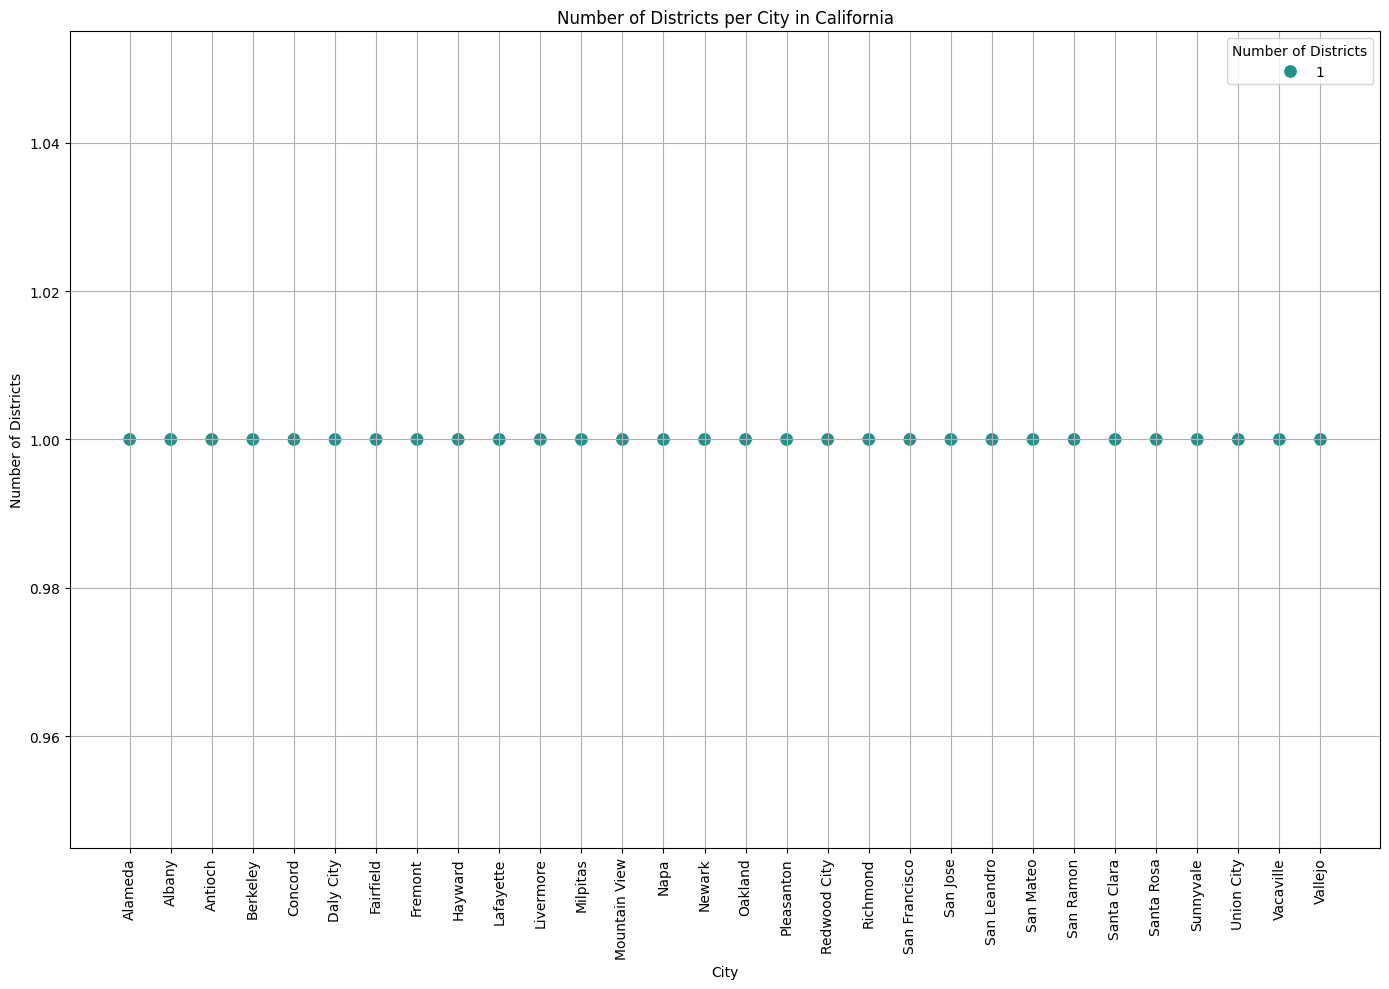

  placename  Number of Districts
0   Alameda                    1
1    Albany                    1
2   Antioch                    1
3  Berkeley                    1
4   Concord                    1


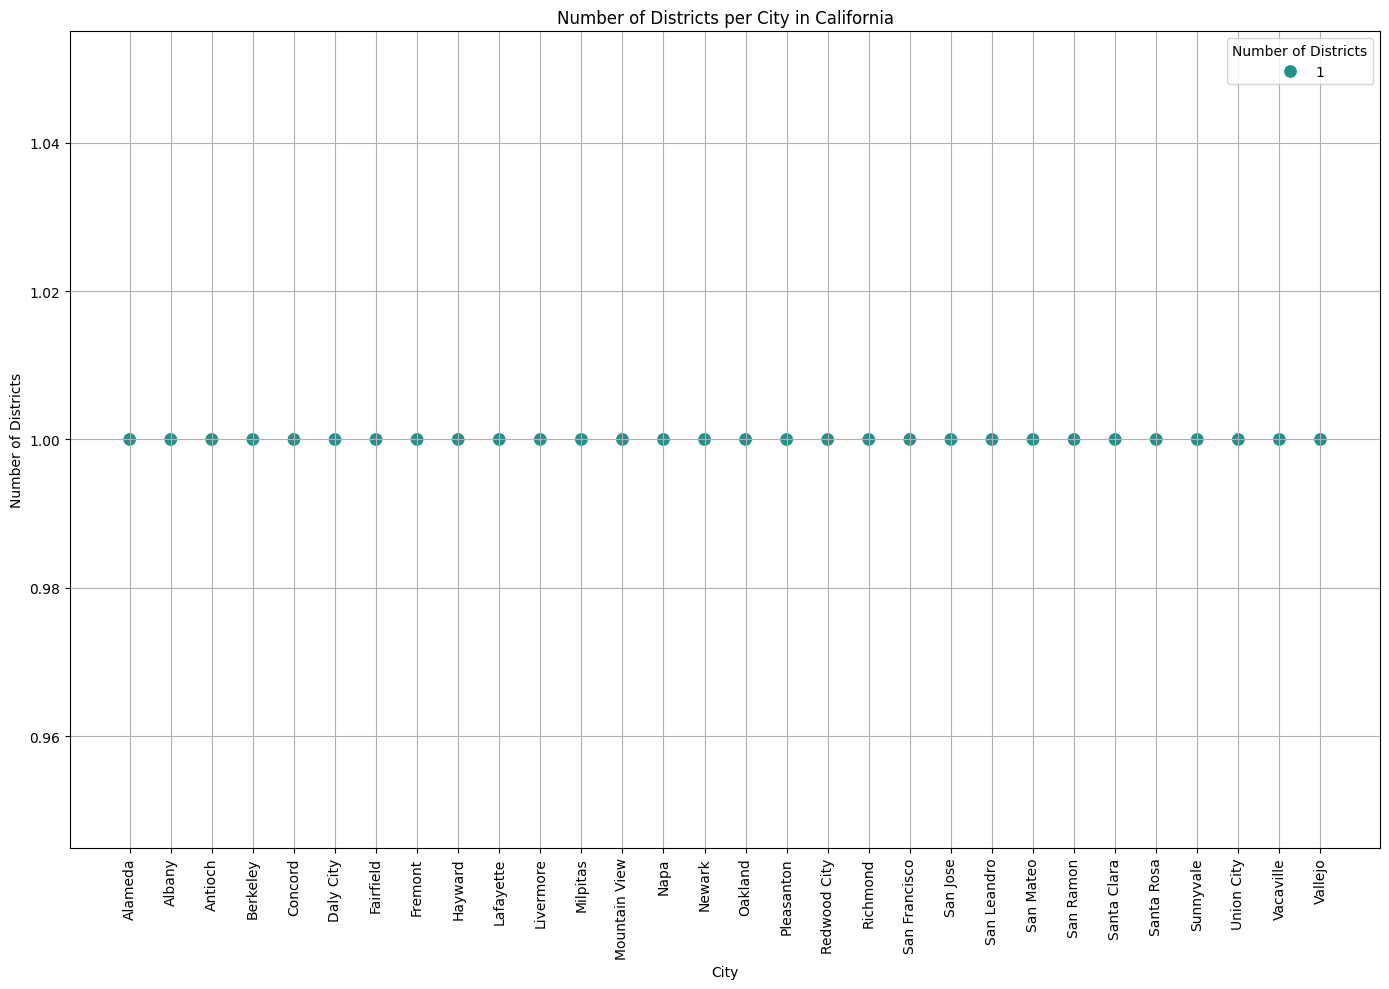

In [394]:
#FILL IN - Validate the cleaning was successful
# Calculate the number of unique population groups per city in California
bin_city_district_counts = bin_data_clean.groupby('placename').size().reset_index(name='Number of Districts')

# Check the result to ensure correctness
print(bin_city_district_counts.head())

# Plot
plt.figure(figsize=(14, 10))
sns.scatterplot(data=bin_city_district_counts, x='placename', y='Number of Districts', hue='Number of Districts', palette='viridis', s=100)
plt.title('Number of Districts per City in California')
plt.xlabel('City')
plt.ylabel('Number of Districts')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate the number of unique population groups per city in California
smo_city_district_counts = smo_data_clean.groupby('placename').size().reset_index(name='Number of Districts')

# Check the result to ensure correctness
print(smo_city_district_counts.head())

# Plot
plt.figure(figsize=(14, 10))
sns.scatterplot(data=smo_city_district_counts, x='placename', y='Number of Districts', hue='Number of Districts', palette='viridis', s=100)
plt.title('Number of Districts per City in California')
plt.xlabel('City')
plt.ylabel('Number of Districts')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

Justification: In this cleaning process, the code addresses the issue of cities being fragmented into multiple districts by aggregating data at the city level. It calculates the weighted average of binge drinking prevalence, accounting for the varying populations of each district, which ensures that the resulting binge drinking measure accurately reflects the city’s overall condition rather than being skewed by smaller districts. By summing the total population and calculating a weighted binge average, the code consolidates district-level data into a coherent city-level overview. This approach resolves discrepancies due to fragmentation and provides a clear, aggregated dataset that better represents each city’s health profile.

### **Remove unnecessary variables and combine datasets**

In [395]:
# Remove unnecessary variables from the first dataset
# Select only the required columns
pov_data_clean = pov_data_clean[['City', 'Year', 'Pov200']]

#FILL IN - Remove unnecessary variables and combine datasets
pov_data_clean = pov_data_clean.copy()
bin_data_clean = bin_data_clean.copy()
smo_data_clean = smo_data_clean.copy()

# Rename columns for clarity
pov_data_clean.rename(columns={'Pov200': 'PovertyPopulation'}, inplace=True)
bin_data_clean.rename(columns={'binge_crudeprev': 'BingeDrinkingPercentage'}, inplace=True)
smo_data_clean.rename(columns={'csmoking_crudeprev': 'SmokingPercentage'}, inplace=True)

# Remove unnecessary column from datasets
pov_data_clean = pov_data_clean.drop(columns=['Year'])
bin_data_clean = bin_data_clean.drop(columns=['bin_total_population'])
smo_data_clean = smo_data_clean.drop(columns=['smo_total_population'])

# Rename 'placename' to 'City' in bin_data_clean and smo_data_clean to match pov_data_clean
bin_data_clean.rename(columns={'placename': 'City'}, inplace=True)
smo_data_clean.rename(columns={'placename': 'City'}, inplace=True)

# Merge the datasets on the 'City' column
mixed_data = pd.merge(pov_data_clean, bin_data_clean, on='City')
combined_data = pd.merge(mixed_data, smo_data_clean, on='City')

In [396]:
# Post-merge adjustments

# Remove the 'population2010_y' column
if 'population2010_y' in combined_data.columns:
    combined_data.drop(columns=['population2010_y'], inplace=True)

# Rename 'population2010_x' column to 'Population'
if 'population2010_x' in combined_data.columns:
    combined_data.rename(columns={'population2010_x': 'Population'}, inplace=True)

# Save the combined dataset
combined_data.to_csv('poverty_health_data_2024_9_5_cleaned.csv', index=False)
combined_data.head(27)
print("Combined dataset saved as 'poverty_health_data_2024_9_5_cleaned.csv'.")

Combined dataset saved as 'poverty_health_data_2024_9_5_cleaned.csv'.


In [397]:
combined_data.info()
combined_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City                     27 non-null     object 
 1   PovertyPopulation        27 non-null     float64
 2   Population               27 non-null     int64  
 3   BingeDrinkingPercentage  27 non-null     float64
 4   SmokingPercentage        27 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.2+ KB


,City,PovertyPopulation,Population,BingeDrinkingPercentage,SmokingPercentage
0,Alameda,14559.0,73812,18.139381,11.250612
1,Antioch,33124.0,102372,18.402614,15.374337
2,Berkeley,34001.0,112580,20.704023,10.401839
3,Concord,34606.0,201109,18.597797,15.569108
4,Daly City,22851.0,101123,13.894418,10.313428
5,Fairfield,30885.0,105305,18.419880,15.159870
6,Fremont,27415.0,214089,17.580256,9.544617
7,Hayward,44502.0,144170,19.159000,13.779878
8,Livermore,12542.0,80968,22.486380,12.583421
9,Milpitas,13197.0,66722,13.505703,10.037646


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

In [398]:
# Save the raw data
pov_data.to_csv('poverty_data_2024_9_5_raw.csv', index=False)
bin_data.to_csv('binge_data_2024_9_5_raw.csv', index=False)


# Save the cleaned data
pov_data_clean.to_csv('poverty_data_2024_9_5_cleaned.csv', index=False)
bin_data_clean.to_csv('binge_data_2024_9_5_cleaned.csv', index=False)
smo_data_clean.to_csv('smoking_data_2024_9_5_cleaned.csv', index=False)
combined_data.to_csv('poverty_health_data_2024_9_5_cleaned.csv', index=False)

## 5. Answer the research question

*Research question: What is the relationship between poverty levels and the prevalence of drinking and smoking in cities within California, as analyzed through datasets detailing poverty and health indicators?

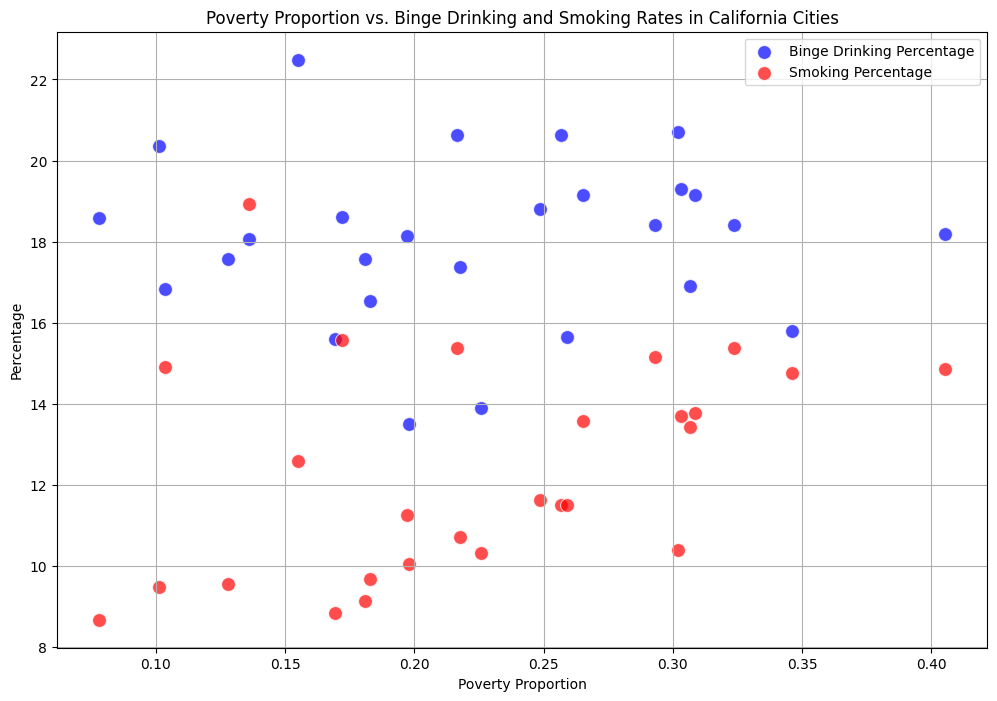

In [399]:
#Visual 1 - FILL IN
# Calculate the proportion of poverty population relative to total population
combined_data['PovertyProportion'] = combined_data['PovertyPopulation'] / combined_data['Population']

# Set the size of the combined scatterplot
plt.figure(figsize=(12, 8))

# Scatterplot for Binge Drinking Percentage
sns.scatterplot(data=combined_data, x='PovertyProportion', y='BingeDrinkingPercentage', 
                color='blue', label='Binge Drinking Percentage', alpha=0.7, s=100)

# Scatterplot for Smoking Percentage
sns.scatterplot(data=combined_data, x='PovertyProportion', y='SmokingPercentage', 
                color='red', label='Smoking Percentage', alpha=0.7, s=100)

# Adding titles and labels
plt.title('Poverty Proportion vs. Binge Drinking and Smoking Rates in California Cities')
plt.xlabel('Poverty Proportion')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)
plt.show()

*Answer to the research question:* This scatter plot visualizes the relationship between the poverty proportion and the prevalence of drinking and smoking in each city. By plotting poverty against drinking and smoking rates, we can identify if there is a visible trend or correlation. In this instance, we can observe a weak positive correlation. This suggests that while higher poverty rates can be associated with alcohol and tobacco abuse rates in California cities, the relationship is not strong.

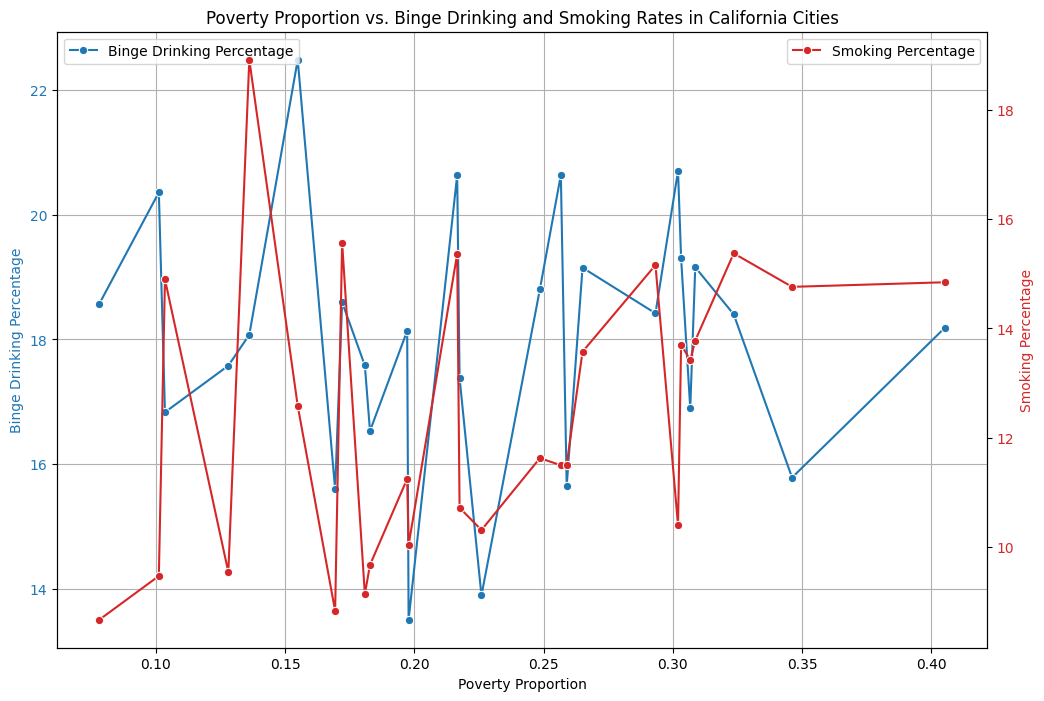

In [400]:
#Visual 2 - FILL IN
# Create a new figure and axis
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot binge drinking percentage on the primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Poverty Proportion')
ax1.set_ylabel('Binge Drinking Percentage', color=color)
sns.lineplot(data=combined_data, x='PovertyProportion', y='BingeDrinkingPercentage', color=color, marker='o', ax=ax1, label='Binge Drinking Percentage')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for smoking percentage
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Smoking Percentage', color=color)  
sns.lineplot(data=combined_data, x='PovertyProportion', y='SmokingPercentage', color=color, marker='o', ax=ax2, label='Smoking Percentage')
ax2.tick_params(axis='y', labelcolor=color)

# Add a title
plt.title('Poverty Proportion vs. Binge Drinking and Smoking Rates in California Cities')

# Add legends for both y-axes
# Only set the legend for the primary axis
ax1.legend(loc='upper left')
# Avoid adding a second legend on the secondary axis
# ax2.legend(loc='upper right')

# Show grid for both y-axes
ax1.grid(True)

# Display the plot
plt.show()

*Answer to the research question:* The dual-axis line plot illustrates a very weak positive correlation between poverty levels and both binge drinking and smoking prevalence in California cities. Despite the presence of a slight upward trend in both health indicators as poverty levels increase, the relationship is not strong or consistent. This weak correlation suggests that while there may be some association between higher poverty levels and increased rates of binge drinking and smoking, it is not significant enough to infer a robust or definitive link between these variables.

### **5.2:** Reflection

If given more time, I would delve into additional health-related variables in the health dataset to explore their correlations with both poverty and drinking and smoking rates, such as physical activity levels or access to healthcare. Additionally, I would investigate any potential data quality issues like missing values or outliers in both datasets to ensure a more robust analysis. Further, I would expand the research to include longitudinal studies to assess how changes in poverty over time impact health outcomes, providing a more comprehensive view of these dynamics.